## derin öğrenme tabanlı dil modelleri
- word embeddings
- Recurrent neural networks
- Long short-term memory
- Transformers modelleri => BERT,GPT,LLAMA

### word embedding
- kelimeleri sayısal vektörlerle ifade eder
- kelimeler arasındaki anlamsal ilişkileri öğrenir
- benzerlikleri görselleştirme için => t-SNE, PCA
- 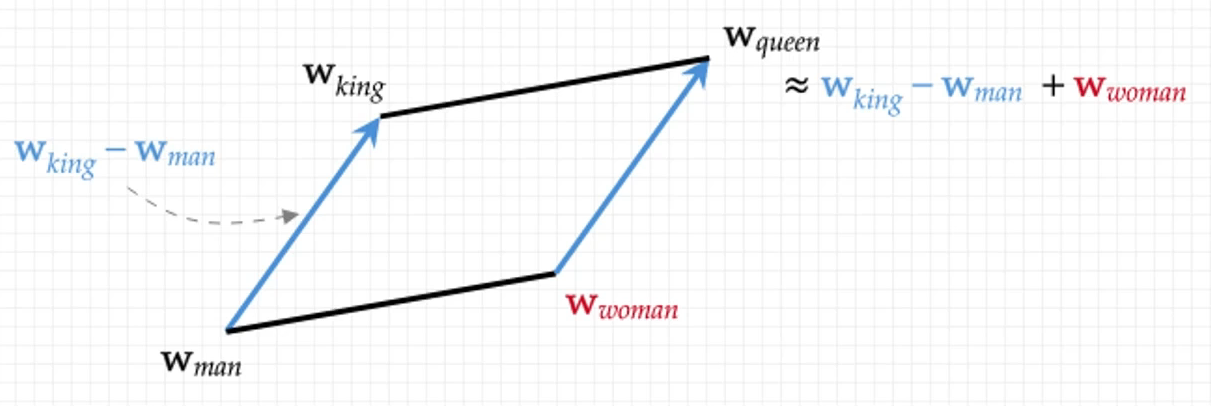
- 
- 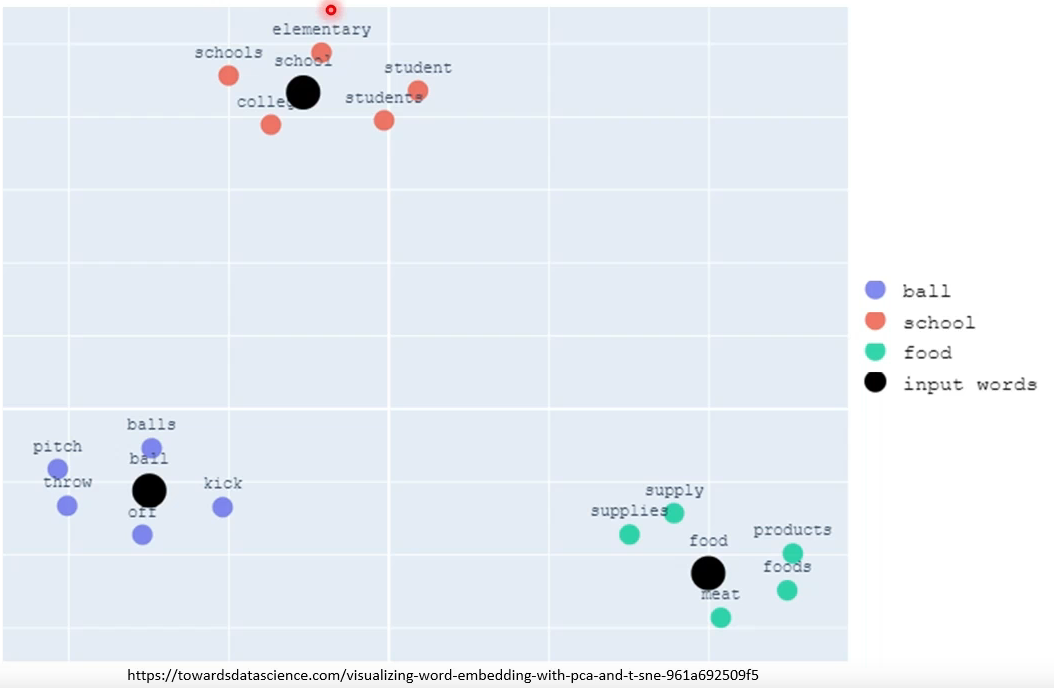




#### Word2Vec
- dilsel anlamları yakalar
- google
- anlamsal yakınlıkları kelime komşuluklarına göre öğrenir
- temel modelleri => CBOW ve Skip-Gram
- 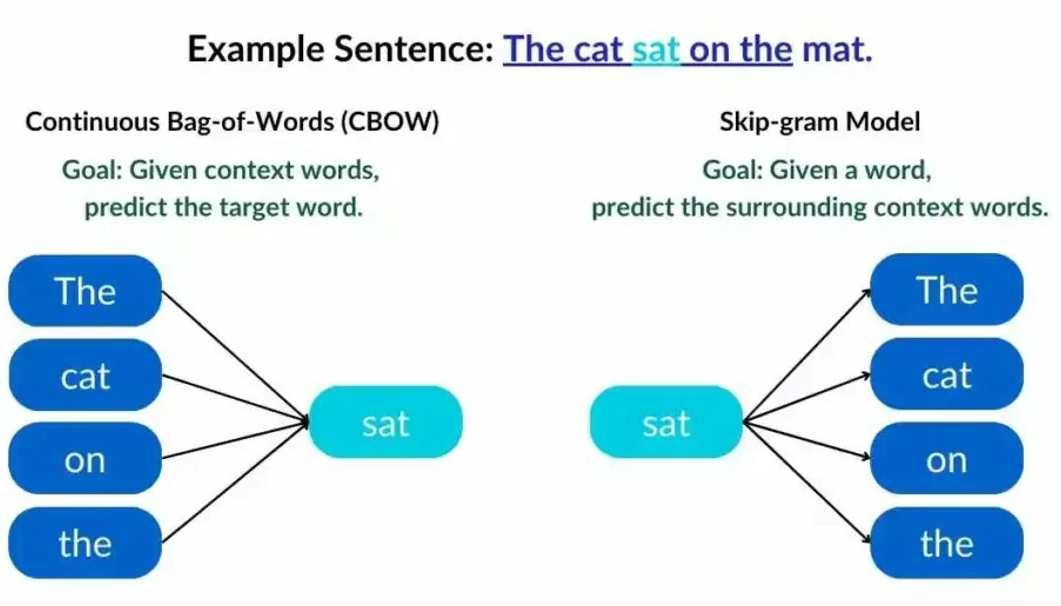

#### FastText
- kelimeleri karakter seviyesinde de öğrenir, nadir kelimeler için güçlüdür
- meta ai

## recurrent neural networks (RNN)
- zaman serisi => zaman içinde ardışık olan gözlemler (borsadaki kağıtlar vs)
- sekans verisi => doğal sıralık bağımlılıkları olan gözlemler (dil, dna vs..)
- dizisel bağımlılık => her bir öğe sırayla önceki öğelere bağlı (cümlede her kelimenin anlamı öncekine bağlı.. oda sıcaklığı bugünkü sıcaklığa bağlı)
- feed forward nn
    - sabit boyutlu giriş çıkış var. sekans verileri dinamik uzunlukkta.. bundan dolayı ffnn yetersiz
    - zaman bağımlılığı.. ffnn'de her veri noktası bağımsız işlenir
    - geçmiş veriyi kaydetmez
- rnn, önceki zaman adımındaki bilgiyi saklar ve sonraki adımlarda bu bilgiyi günceller
- vanishing gradient sorunu var eğitimde.. kısa dönem bağımlılıkları öğrenir, uzun dönem bağımlılıklarda zorlanır
- kullanım alanları
    - dil modelleme
    - makine çevirisi
    - duygu analizi
    - konuşma tanıma
    - metin üretimi
- 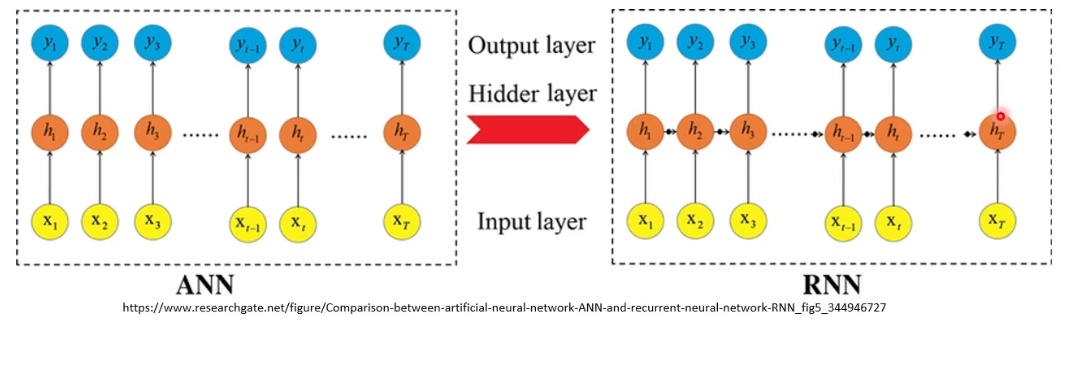
- 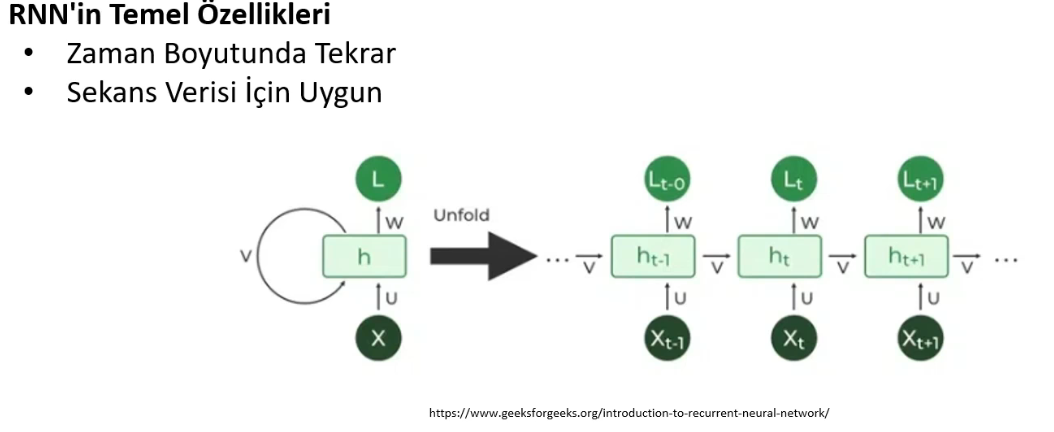
- 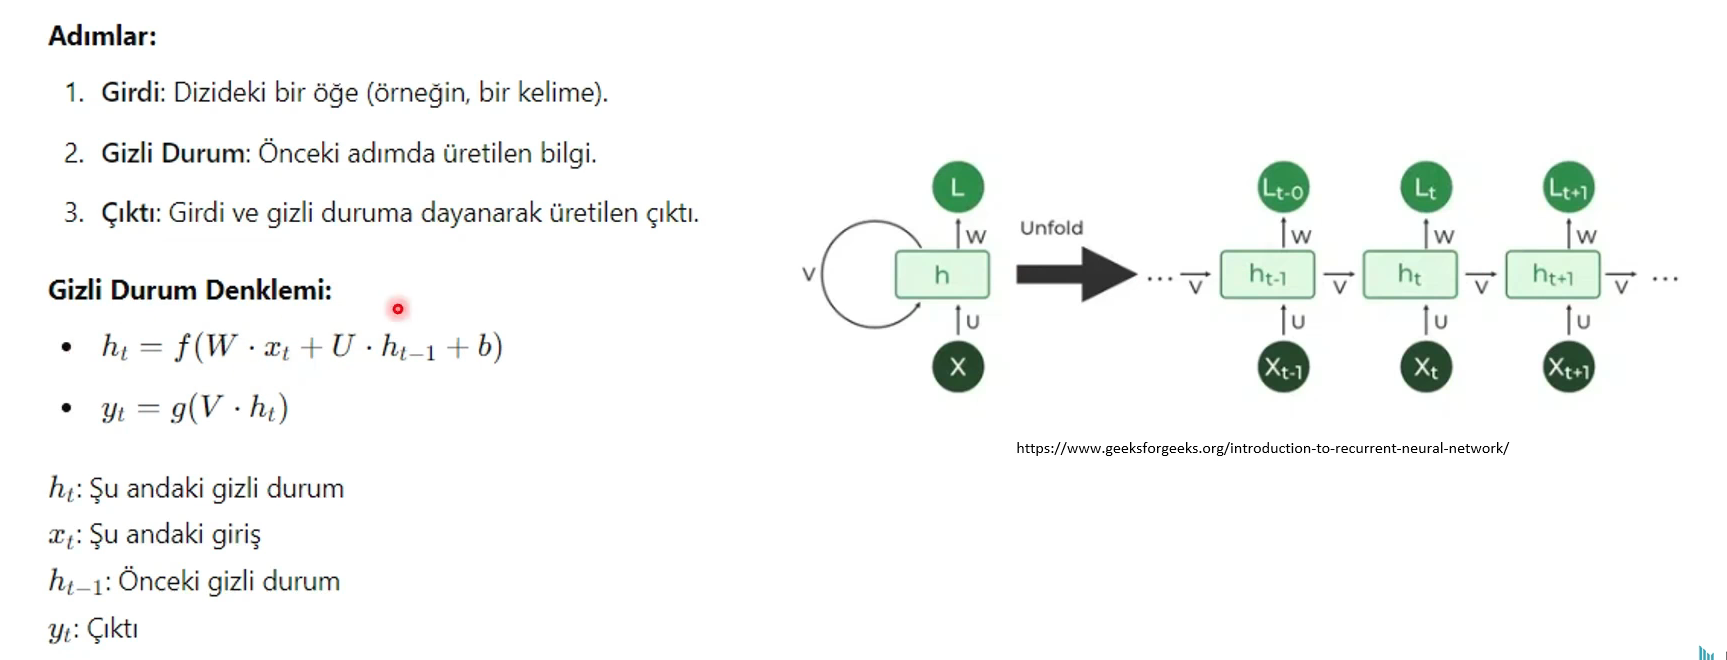


In [12]:
import pandas as pd
import numpy as np

from gensim.models import Word2Vec

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = {
    "text":  [  
    "Hizmet hızla ilgili sorun yaşıyoruz.",  
    "Yemek sepeti baya hızlı çalışıyor.",  
    "Buraya sık sık geliyorum, değişmiyor.",  
    "Hizmet gerçekten çok yavaştı, bir daha gelmem.",  
    "Çok güzel bir akşam yemeği geçirdik.",  
    "Yemeklerin sunumu harikaydı, göze de hitap ediyor.",  
    "Burası benim favori mekanım oldu.",  
    "Temizlik konusunda bir sıkıntı vardı.",  
    "Restoran çok kalabalıktı, yer bulmak zor oldu.",  
    "Yemeklerin tadı harika, kesinlikle tavsiye ederim.",  
    "Dışarıda oturmak harika, manzara güzel.",  
    "Yemeklerden bir tanesi yanmıştı, şikayet ettim.",  
    "Biraz daha çeşitlilik istiyorum.",  
    "Yemekler harikaydı, tekrar gelmek istiyorum.",  
    "Yemeklerin fiyatlarının üzerine koymam gerekiyor.",  
    "Zamanında gelmeye çalıştım, uzun bir bekleme süresi oldu.",  
    "Bekleme süresi uzundu ama yemek iyiydi.",  
    "Tatlıları farklı ve lezzetliydi.",  
    "Güzel bir atmosfer, personel güler yüzlü.",  
    "Tatlılar gerçekten harika, kesinlikle denemelisiniz.",  
    "Personelin eğitimi biraz daha iyi olabilir.",  
    "Atmosfer samimi ve sıcak, çok sevdim.",  
    "Yemeğin yanında ikram edilen ekmek çok lezzetliydi.",  
    "Fiyat-performans oranı bence çok iyi.",  
    "Restoran yenilenmiş, çok daha güzel olmuş.",  
    "Tatlılar çok güzeldi! Mutlaka denemelisiniz.",  
    "Burası çok hoş, arkadaşlarıma önerdim.",  
    "Güler yüzlü personel, samimi bir ortam yaratıyor.",  
    "Biraz daha hızlı olmaları gerekiyor.",  
    "Fiyatlar biraz yüksek ama ambiyans harika.",  
    "Çok iyi bir restoran, herkese tavsiye ediyorum.",  
    "Menü çok çeşitli, her zevke uygun yemek var.",  
    "Yemekler çok hızlı geldi, teşekkürler.",  
    "Mükemmel bir deneyim! Yemekler çok lezzetliydi.",  
    "Yemeklerin tadı muhteşemdi, bayıldım.",  
    "Yemeklerin tadı normaldi, beklediğim gibi değil.",  
    "Hizmet kalitesi yükselmiş, çok memnun kaldım.",  
    "Yemekler harika ama servis bir o kadar kötü.",  
    "Bir daha buraya gelmem, beklentimi karşılamadı.",  
    "Burası sık sık geldiğim bir yer, çok memnunum.",  
    "Restoran çok kalabalık, yer bulmak zor.",  
    "Tatlı servisleri çok yavaş geldi.",  
    "Yemeğin sunumu çok güzel ama lezzeti ortalama.",  
    "Arkadaşlarımla burada güzel bir akşam yemeği yedim.",  
    "Farklı bir deneyim için burayı seçin.",  
    "Özellikle deniz ürünleri çok taze ve iyi pişirilmişti.",  
    "Çalışanlar ilgisizdi, biraz daha dikkatli olmalılar.",  
    "Çok iyi bir kahvaltı menüsü var.",  
    "Başarılı bir restoran, mutlaka denemelisiniz.",  
    "Hızlı ve pratik bir servis, teşekkürler."  
] ,
    "label":[  
    "negative", "negative", "negative", "negative", "positive",  
    "positive", "negative", "positive", "positive", "negative",  
    "positive", "negative", "negative", "positive", "negative",  
    "positive", "negative", "positive", "negative", "negative",  
    "negative", "negative", "positive", "negative", "negative",  
    "positive", "negative", "negative", "negative", "positive",  
    "negative", "negative", "negative", "negative", "negative",  
    "positive", "negative", "positive", "negative", "positive",  
    "negative", "positive", "positive", "negative", "negative",  
    "negative", "negative", "positive", "positive", "positive"  
]  
}

df = pd.DataFrame(data)
print(df.head())

                                             text     label
0            Hizmet hızla ilgili sorun yaşıyoruz.  negative
1              Yemek sepeti baya hızlı çalışıyor.  negative
2           Buraya sık sık geliyorum, değişmiyor.  negative
3  Hizmet gerçekten çok yavaştı, bir daha gelmem.  negative
4            Çok güzel bir akşam yemeği geçirdik.  positive


In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])
word_index = tokenizer.word_index

maxlen = max(len(seq) for seq in sequences)
X = pad_sequences(sequences,maxlen)
print(X.shape)

(50, 8)


In [14]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["label"])

In [22]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sentences = [text.split() for text in df["text"]]
word2vec_model = Word2Vec(sentences,vector_size=50,window=5,min_count=1)

embedding_dim=50
embedding_matrix = np.zeros((len(word_index)+1,embedding_dim))
for word,i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00097487  0.00061118  0.01017198 ...  0.01916927  0.01000753
   0.01844832]
 [-0.01626926  0.00904541 -0.00822402 ... -0.01411138  0.00183323
   0.01278247]
 ...
 [-0.0072186   0.00722172 -0.00517521 ...  0.00081348 -0.01905626
   0.0050818 ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.01104891 -0.00245864 -0.01108591 ...  0.0151469  -0.01283338
  -0.01572408]]


In [32]:
import warnings
warnings.filterwarnings("ignore")
model = Sequential()
model.add(Embedding(
                input_dim=len(word_index)+1,
                output_dim=embedding_dim,
                weights=[embedding_matrix],input_length=maxlen,trainable=False))
model.add(SimpleRNN(units=50,return_sequences=False))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])



In [33]:
model.fit(X_train,y_train,epochs=10,batch_size=2,validation_data=(X_test,y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4936 - loss: 0.6907 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6706 - loss: 0.6543 - val_accuracy: 0.5000 - val_loss: 0.7179
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6758 - loss: 0.5993 - val_accuracy: 0.5000 - val_loss: 0.7929
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7031 - loss: 0.5412 - val_accuracy: 0.5000 - val_loss: 0.6857
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.5572 - val_accuracy: 0.5000 - val_loss: 0.7250
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6775 - loss: 0.5558 - val_accuracy: 0.5000 - val_loss: 0.7447
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8587 - loss: 0.3952 - val_accuracy: 0.5000 - val_loss: 0.7837
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8505 - loss: 0.3710 - val_accuracy: 0.6000 - val_loss

In [34]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6000 - loss: 0.6728


In [35]:
print(f"test loss: {test_loss}")
print(f"test accuracy: {test_accuracy}")

test loss: 0.6728341579437256
test accuracy: 0.6000000238418579


In [47]:
sample_sentence="Çok memnun kaldık ve eğlenceliydi"
seq=tokenizer.texts_to_sequences([sample_sentence])
padded_seq = pad_sequences(seq,maxlen)
prediction = model.predict(padded_seq)
#prediction = "positive" if  (prediction>0.5).astype(int)[0][0]==1 else "negative"
print(f"prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
prediction: [[0.15869345]]


### long short-term memory (LSTM)
- RNN türlerinden birisidir
- uzun vadeli bağımlılıkları öğrenebilmek için tasarlanmıştır.
- kullanım alanları:
    - nlp
    - konuşma tanıma
    - zaman serisi tahmini
    - müzik ve metin üretimi
    - video işleme
- 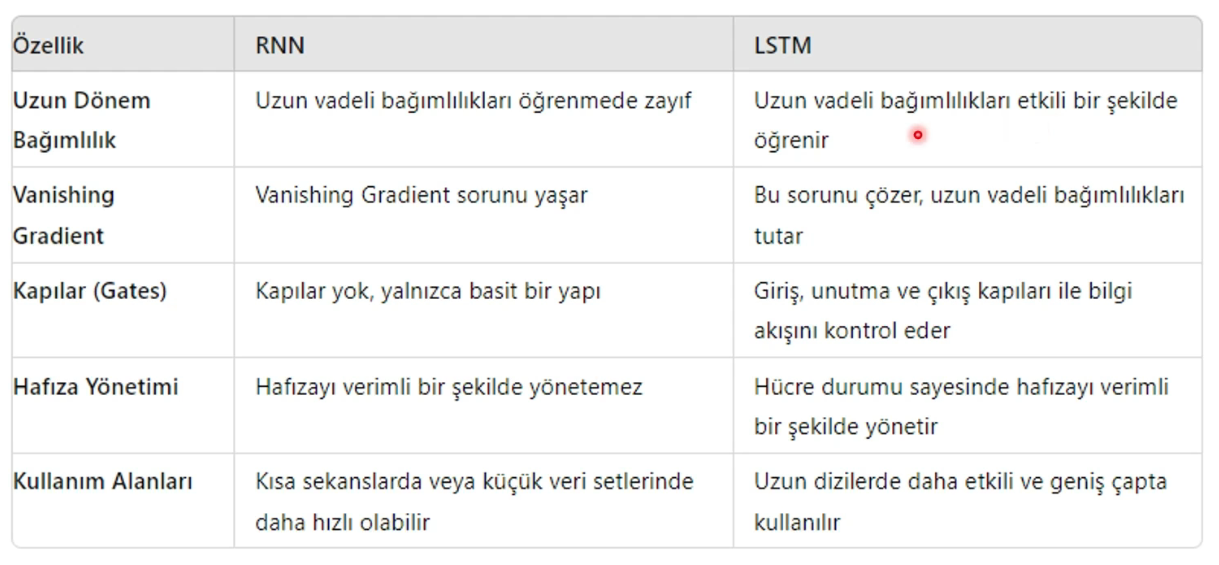
- 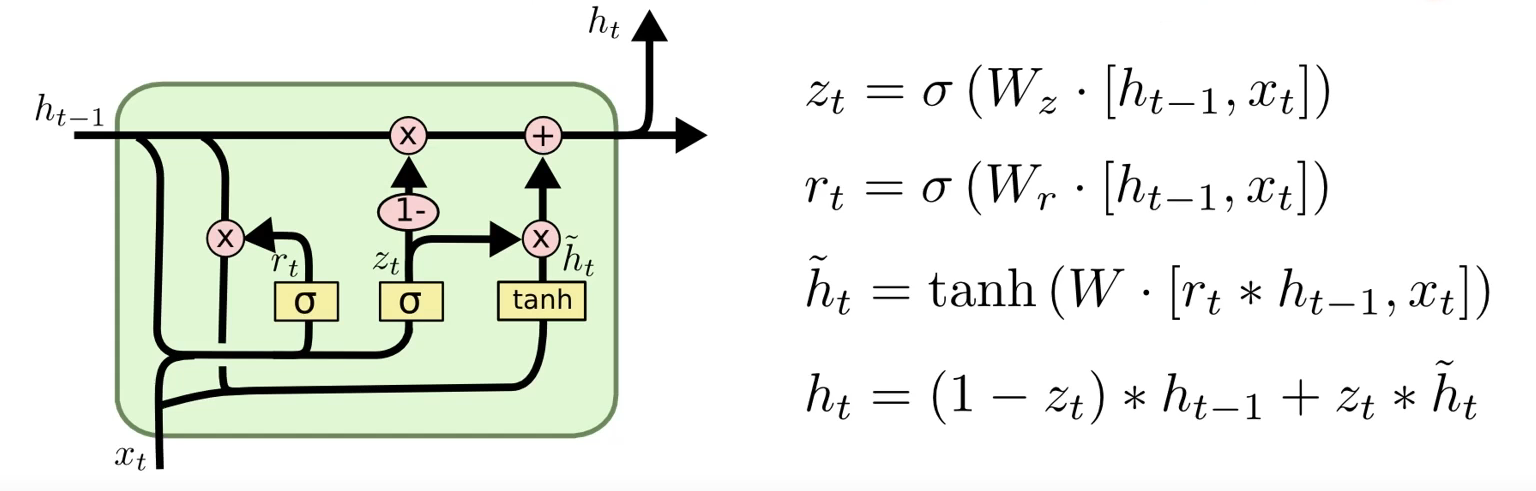
- 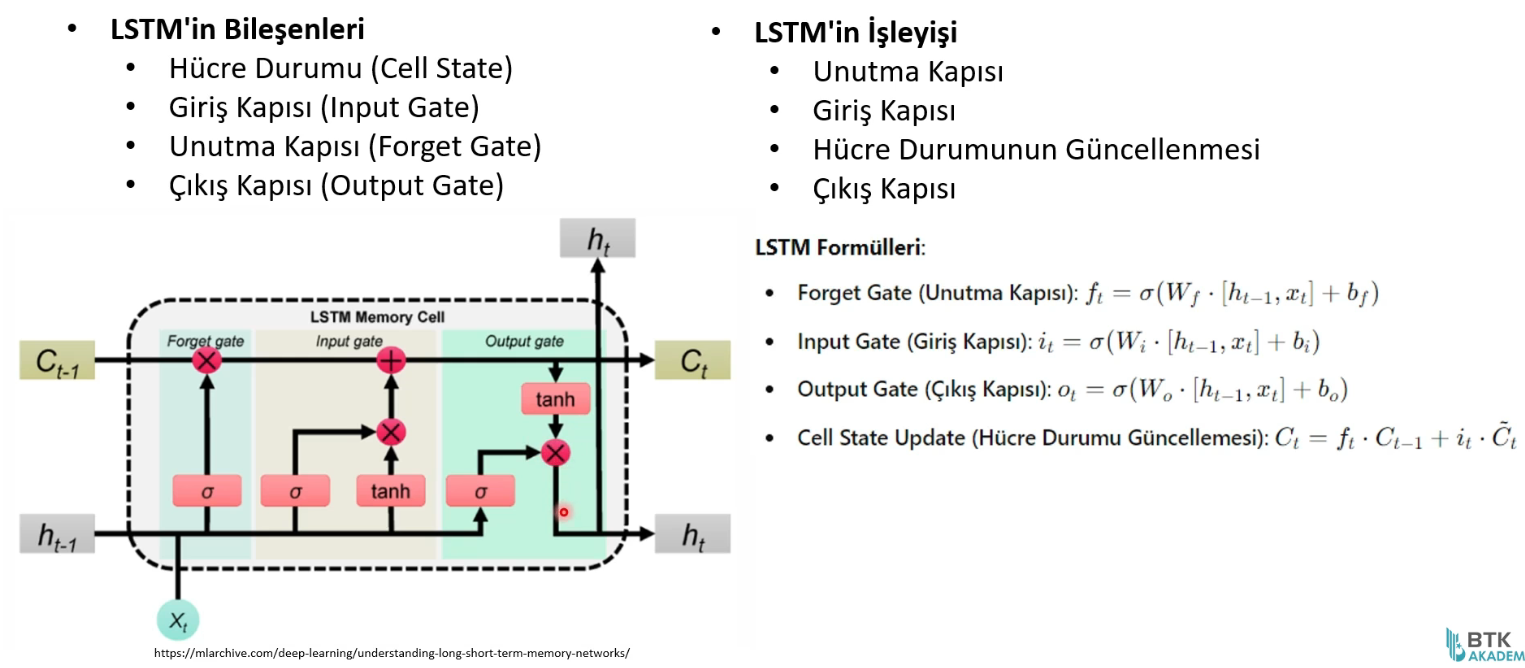

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
texts = [  
    "Bugün hava çok güzel, dışarıda yürüyüş yapacağım.",  
    "Kitap okumayı çok seviyorum.",  
    "Yemek yapmak benim için bir tutku.",  
    "Arkadaşlarımla sinemaya gitmeyi planlıyorum.",  
    "Doğa yürüyüşleri yapmayı seviyorum.",  
    "Yeni bir dil öğrenmek istiyorum.",  
    "Sahilde gün batımını izlemek harika.",  
    "Müzik dinlemek ruhumu dinlendiriyor.",  
    "Spor yapmak sağlığım için önemli.",  
    "Yaz tatilinde yeni yerler keşfetmek istiyorum.",  
    "Kahvaltıda peynirli tost yemeyi severim.",  
    "Film izlemek en sevdiğim hobilerden biri.",  
    "Kedimle oynamak günümü güzelleştiriyor.",  
    "Bahçede çiçekler sulamak hoşuma gidiyor.",  
    "Yazmak, düşüncelerimi ifade etmenin güzel bir yolu.",  
    "Yeni tarifler denemek eğlenceli.",  
    "Kütüphanede vakit geçirmekten keyif alıyorum.",  
    "Günlük tutmak, anılarımı saklamama yardımcı oluyor.",  
    "Kahve içmek, sabahları enerjimi artırıyor.",  
    "Yürüyüş yapmak, zihnimi boşaltıyor.",  
    "Resim yapmak, yaratıcılığımı ortaya çıkarıyor.",  
    "Dışarıda piknik yapmak çok eğlenceli.",  
    "Yeni bir film izlemek için sabırsızlanıyorum.",  
    "Bahçemde sebze yetiştirmek istiyorum.",  
    "Müzik aleti çalmayı öğrenmek harika olur.",  
    "Kışın kayak yapmayı seviyorum.",  
    "Yaz tatilinde deniz kenarında dinlenmek güzel.",  
    "Arkadaşlarımla oyun oynamak eğlenceli.",  
    "Kedimle birlikte film izlemek hoşuma gidiyor.",  
    "Yeni bir hobi edinmek istiyorum.",  
    "Seyahat etmek, yeni kültürler tanımak için harika.",  
    "Kahvaltıda taze meyve yemek sağlıklı.",  
    "Yaz aylarında kamp yapmayı planlıyorum.",  
    "Gün batımında yürüyüş yapmak çok keyifli.",  
    "Yemek tarifleri denemek eğlenceli bir aktivite.",  
    "Kütüphanede sessiz bir köşe bulmak hoş.",  
    "Spor salonunda çalışmak motivasyonumu artırıyor.",  
    "Yazı yazmak, düşüncelerimi düzenlememe yardımcı oluyor.",  
    "Doğa fotoğrafları çekmek hoşuma gidiyor.",  
    "Yeni bir kitap almak için sabırsızlanıyorum.",  
    "Kahve dükkanında oturup kitap okumak keyifli.",  
    "Yüzme havuzunda serinlemek harika.",  
    "Bahçemde çiçekler açtığında mutlu oluyorum.",  
    "Yemek yaparken müzik dinlemek hoşuma gidiyor.",  
    "Sahilde yürüyüş yapmak ruhumu dinlendiriyor.",  
    "Yeni bir restoranda yemek yemek heyecan verici.",  
    "Kedimle oyun oynamak günümü güzelleştiriyor.",  
    "Kışın sıcak çikolata içmek çok keyifli.",  
    "Yaz tatilinde yeni yerler keşfetmek istiyorum.",  
    "Arkadaşlarımla birlikte konser izlemek eğlenceli.",  
    "Kütüphanede çalışmak verimli geçiyor.",  
    "Günlük tutmak, düşüncelerimi düzenlememe yardımcı oluyor.",  
    "Yeni bir dil öğrenmek zorlu ama eğlenceli.",  
    "Seyahat etmek, yeni insanlarla tanışmak için harika.",  
    "Kahvaltıda omlet yapmak hoşuma gidiyor.",  
    "Yürüyüş yapmak, sağlığım için faydalı.",  
    "Resim yapmak, yaratıcılığımı ortaya çıkarıyor.",  
    "Dışarıda piknik yapmak çok eğlenceli.",  
    "Yeni bir film izlemek için sabırsızlanıyorum.",  
    "Bahçemde sebze yetiştirmek istiyorum.",  
    "Müzik aleti çalmayı öğrenmek harika olur.",  
    "Kışın kayak yapmayı seviyorum.",  
    "Yaz tatilinde deniz kenarında dinlenmek güzel.",  
    "Arkadaşlarımla oyun oynamak eğlenceli.",  
    "Kedimle birlikte film izlemek hoşuma gidiyor.",  
    "Yeni bir hobi edinmek istiyorum.",  
    "Seyahat etmek, yeni kültürler tanımak için harika.",  
    "Kahvaltıda taze meyve yemek sağlıklı.",  
    "Yaz aylarında kamp yapmayı planlıyorum.",  
    "Gün batımında yürüyüş yapmak çok keyifli.",  
    "Yemek tarifleri denemek eğlenceli bir aktivite.",  
    "Kütüphanede sessiz bir köşe bulmak hoş.",  
    "Spor salonunda çalışmak motivasyonumu artırıyor.",  
    "Yazı yazmak, düşüncelerimi düzenlememe yardımcı oluyor.",  
    "Doğa fotoğrafları çekmek hoşuma gidiyor.",  
    "Yeni bir kitap almak için sabırsızlanıyorum.",  
    "Kahve dükkanında oturup kitap okumak keyifli.",  
    "Yüzme havuzunda serinlemek harika.",  
    "Bahçemde çiçekler açtığında mutlu oluyorum.",  
    "Yemek yaparken müzik dinlemek hoşuma gidiyor.",  
    "Sahilde yürüyüş yapmak ruhumu dinlendiriyor.",  
    "Yeni bir restoranda yemek yemek heyecan verici.",  
    "Kedimle oyun oynamak günümü güzelleştiriyor.",  
    "Kışın sıcak çikolata içmek çok keyifli.",  
    "Yaz tatilinde yeni yerler keşfetmek istiyorum.",  
    "Arkadaşlarımla birlikte konser izlemek eğlenceli.",  
    "Kütüphanede çalışmak verimli geçiyor.",  
    "Günlük tutmak, düşüncelerimi düzenlememe yardımcı oluyor."  
]

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
total_words = len(tokenizer.word_index)+1
print(total_words)

# n-gram dizileri ve padding
input_sequences = []
for text in texts:
    token_list=tokenizer.texts_to_sequences([text])[0]

    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_lenght = max(len(x) for x in input_sequences)
print(max_sequence_lenght)

input_sequences = pad_sequences(input_sequences,maxlen=max_sequence_lenght,padding="pre")

X = input_sequences[:,:-1]
y = input_sequences[:,-1]

y=tf.keras.utils.to_categorical(y,num_classes=total_words)


159
7


In [5]:
model = Sequential()

model.add(Embedding(total_words,50,input_length=X.shape[1]))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(total_words,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0417 - loss: 5.0665
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1040 - loss: 5.0411 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0468 - loss: 4.9656 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0523 - loss: 4.7421 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0480 - loss: 4.6837
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0604 - loss: 4.6745     
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0779 - loss: 4.6003
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0911 - loss: 4.5297 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0505 - loss: 4.4433 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1026 - loss: 4.3604 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1336 - loss: 4.1502 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

In [11]:
def generate_text(seed_text,next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list],maxlen=max_sequence_lenght-1,padding="pre")
        predicted_probabilities = model.predict(token_list,verbose=0)
        predicted_word_index=np.argmax(predicted_probabilities,axis=-1)
        predicted_word=tokenizer.index_word[predicted_word_index[0]]
        seed_text = seed_text+" "+predicted_word
    return seed_text

seed_text="Bu hafta sonu "
print(generate_text(seed_text,10))

Bu hafta sonu  batımında yürüyüş yapmak çok keyifli keyifli yürüyüş yapacağım yapacağım yürüyüş


### transformers
- nlp'de devrim
- attention mekanizması ile dildeki öğeler arasındaki bağlamı güçlü bir şekilde kurar
- paralel işleme yeteneği var
- önceden eğitilmiş modellerin yeniden kullanımını sağlar
- 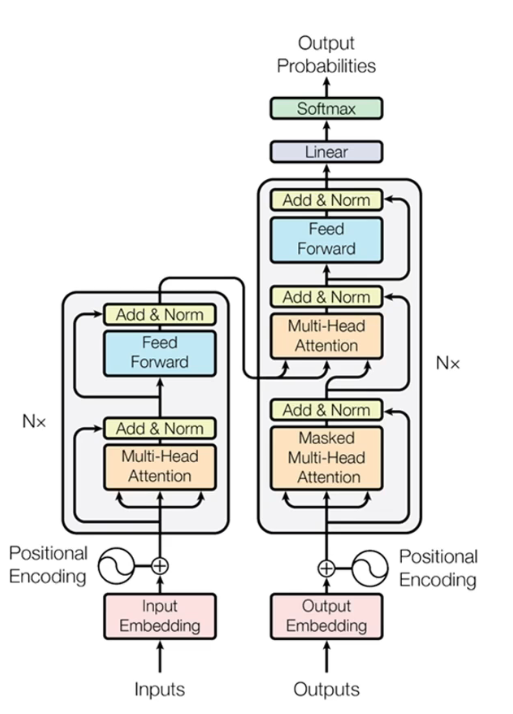
- 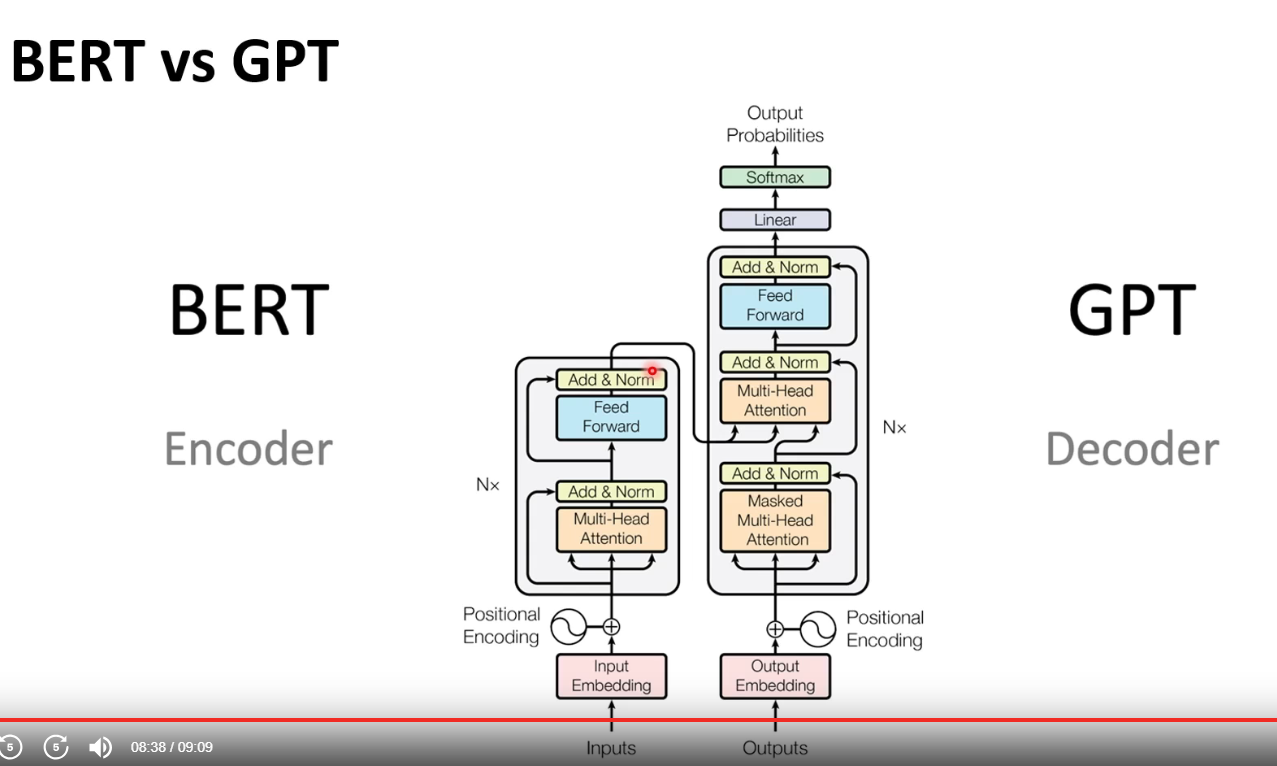
- 



#### BERT
- hem soldan sağa, hem de sağdan sola (geçmiş vs gelecek) ile bağlamı anlar (bidirectional)
- transfer learning
- transformer encoder kullanımı (anlama ve sınıflandırmada kullanılır)




#### GPT
- metin üretme ve dil modelleme için
- soldan sağa okur, bir kelimeyi tahmin etmek için önceki kelimelere dayanır
- metin üretme, öykü yazma, yaratıcı içerirk
- transformer decoder kısmı
- autoregressive => kelime yaratmada önceki kelimeleri dikkate alır
- büyük veri kümesinde dil üretimi için eğitilir
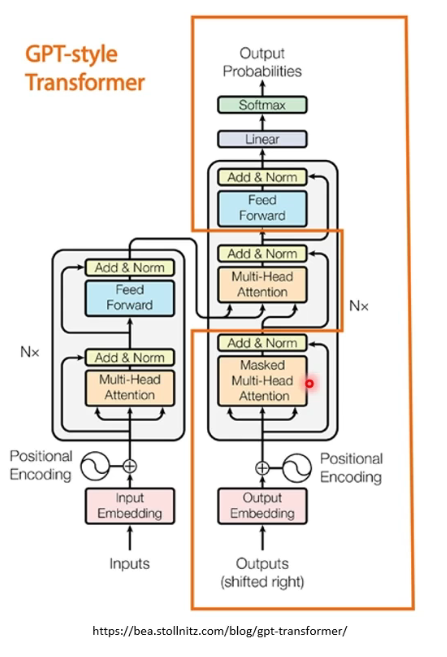



### LLAMA
- metaai
- gp3 e göre az parametre, benzer performans
- transformer tabanlı
- daha verimli eğitim süreci
- daha küçük ve verimli.. araştırma için iyi.

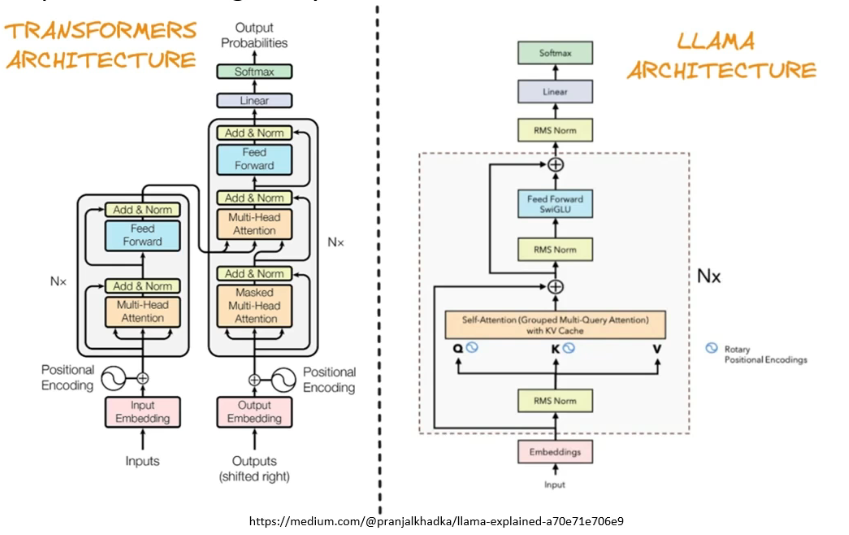

In [ ]:
from transformers import GPT2LMHeadModel,GPT2Tokenizer
from transformers import AutoTokenizer,AutoModelForCausalLM

model_name="gpt2"
llama_model_name="huggyllama/llama-7b"

tokenizer = GPT2Tokenizer.from_pretrained(model_name)
llama_tokenizer = AutoTokenizer.from_pretrained(llama_model_name)

model = GPT2LMHeadModel.from_pretrained(model_name)
llama_model = AutoModelForCausalLM.from_pretrained(llama_model_name)

text = "I go to school for "

inputs = tokenizer.encode (text,return_tensors="pt")
llama_inputs = llama_tokenizer.encode (text,return_tensors="pt")

outputs= model.generate(inputs,max_length=30)
llama_outputs= llama_model.generate(llama_inputs.input_ids,max_length=30)

generated_text = tokenizer.decode(outputs[0],skip_special_tokens=True)
llama_generated_text = llama_tokenizer.decode(llama_outputs[0],skip_special_tokens=True)

print(generated_text)
print(llama_generated_text)

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


model-00001-of-00002.safetensors:   6%|6         | 619M/9.98G [00:00<?, ?B/s]